In [2]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [5]:
players <- read_csv("https://raw.githubusercontent.com/sstephaniewu/video_game_project/refs/heads/main/players.csv")
sessions <- read_csv("https://raw.githubusercontent.com/sstephaniewu/video_game_project/refs/heads/main/sessions.csv")

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# 1) Data Description
This project uses two datasets stored as CSV files: "players.csv" and "sessions.csv". Both datasets were collected from a research study done by a computer science group at UBC on a Minecraft server, where "players.csv" contains individual player data and "sessions.csv" contains individual play session data.

### "players.csv"
* 196 total observations, each representing a different player
* 7 variables:
    * experience (chr): categorical variable showing a player's self-reported experience level ("Beginner", "Amateur", "Regular", "Veteran", "Pro").
    * subscribe (lgl): a true/false (boolean) variable showing if a player is subscribed to to a gaming newsletter.
    * hashedEmail (chr): a categorical variable used as a unique identifer for each individual player.
    * played_hours (dbl): a numerical variable to record how many total hours a player's played.
    * name (chr): a categorical variable for player's name in the server.
    * gender (chr): a categorical variable for the player's gender.
    * age (dbl): a numerical variable for the player's age.

### "sessions.csv"
* 1535 total observations, each representing one play session
* 5 variables:
    * hashedEmail (chr): a categorical variable used as a unique identifer for each individual player.
    * start_time (chr): a categorical variable recording start time of a play session.
    * end_time (chr):a categorical variable recording end time of a play session.
    * original_start_time (dbl): a numerical variable storing start time as a Unix timestamp.
    * original_end_time (dbl): a numerical variable storing end time as a Unix timestamp.

### Potential Issues with Data:
* There are several NA values within the "players.csv" and "sessions.csv" datasets, specifically in the columns "age", "end_time", and "original_end_time". Since these are minor issues, I will just remove them.
* The proportions of players of players for some variables are off. For example, there are only a few self-reported "Pro" players (14) compared to the significantly more self-reported "Amateur" players (63). Furthermore, the median hours played is much lower than the average hours played, meaning most players have little hours while a few have many hours.

### Summary Statistics:

In [8]:
avg_num_players <- players |>
    group_by(experience) |>
    summarize (count = n())

avg_hours <- players |>
summarize(mean_hours = round(mean(played_hours, na.rm = TRUE), 2),
              median_hours = median(played_hours, na.rm = TRUE),
              max_hours = max(played_hours, na.rm = TRUE),
              min_hours = min(played_hours, na.rm = TRUE))

avg_age <- players |>
select(played_hours, Age) |>
  summarise(mean_age = round(mean(Age, na.rm = TRUE), 2))

avg_num_players
avg_hours
avg_age

experience,count
<chr>,<int>
Amateur,63
Beginner,35
Pro,14
Regular,36
Veteran,48


mean_hours,median_hours,max_hours,min_hours
<dbl>,<dbl>,<dbl>,<dbl>
5.85,0.1,223.1,0


mean_age
<dbl>
21.14


# 2) Questions
This project addresses the broad question of "what player characteristics and behaviours are most predictive of subscribing to the game-related newsletter?" My more specific question is "can a player's total play time, total sessions, and self-reported experience level predict whether they subscribe to the newletter?" 

We can use our data to answer the question since it gives us all relevent information we need, including predictor variables, such as "played_hours" and "experience" level, to predict the response variable, "subcribe". This is a binary classification problem, whether the player will or will not subscribe to the newsletter. Lastly, the dataset "sessions.csv" is not required yet to answer this question.

# 3) Exploratory Data Analysis and Visualization
From our summary statistics, I already explored the means within the "players.csv" dataset, including hours played as well as player age. Here is what those quantitative variables look like in a table format:

Average Hours Played|Average Age
--------------------|------------
5.85|21.14

Next, I'll create a few plots to help visualize the data and see if there are any important characteristics I should look out for.

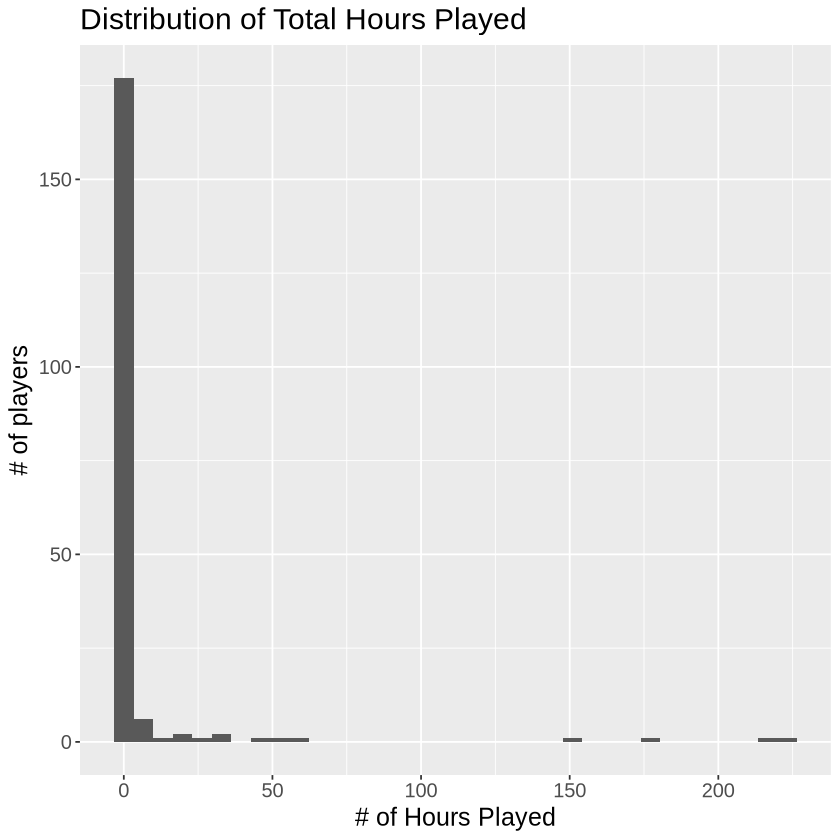

In [9]:
hours_played_plot <- players |>
    ggplot(aes(x = played_hours)) + 
    geom_histogram(bins = 35) +
    labs(x = "# of Hours Played", y = "# of Players", title = "Distribution of Total Hours Played") +
    theme(text= element_text(size= 15))
hours_played_plot

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


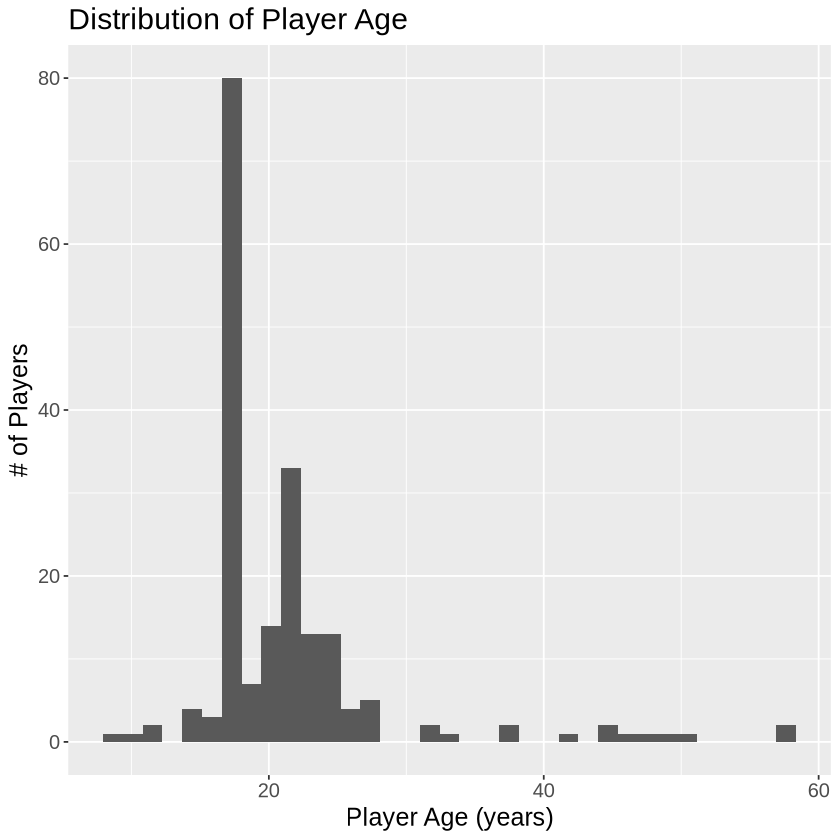

In [11]:
age_plot <- players |>
    ggplot(aes(x = Age)) +
    geom_histogram(bins = 35) +
    labs(x = "Player Age (years)", y = "# of Players", title = "Distribution of Player Age") +
    theme(text = element_text(size = 15))
age_plot

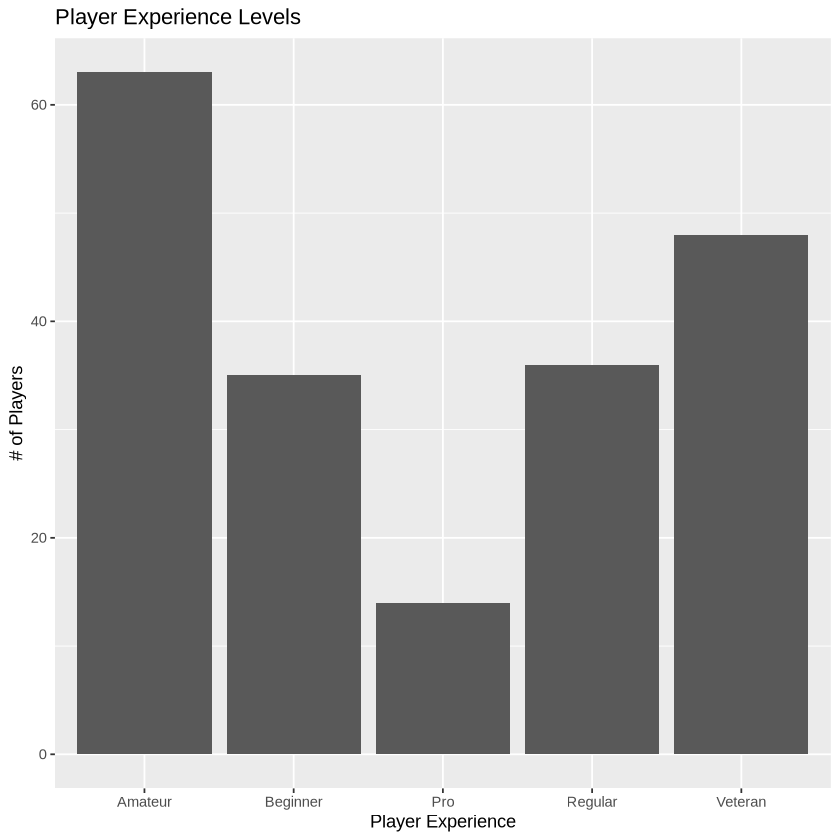

In [13]:
experience_plot <- players |>
    ggplot(aes(x = experience)) +
    geom_bar() +
    labs(x = "Player Experience", y = "# of Players", title = "Player Experience Levels")
experience_plot

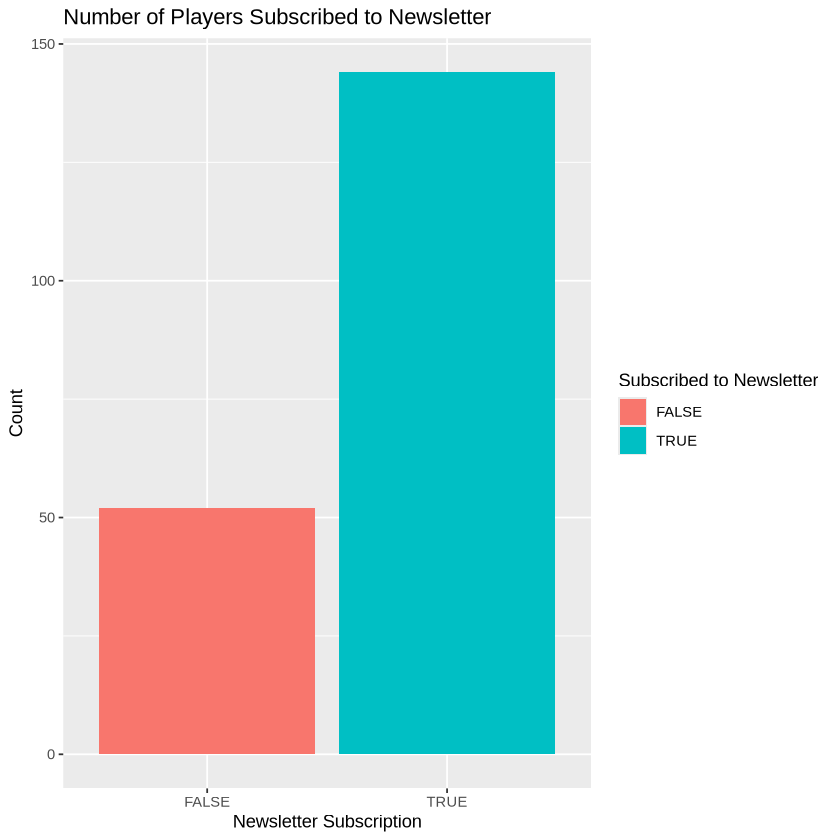

In [16]:
subscribe_plot <- players |>
  ggplot(aes(x = subscribe, fill = subscribe)) +
  geom_bar() +
  labs(x = "Newsletter Subscription", y = "Count", title = "Number of Players Subscribed to Newsletter", fill = "Subscribed to Newsletter",)
subscribe_plot

# 4) Methods and Plan
My chosen method to answer this question is KNN classification. This is an appropriate method because our problem is a simple binary classification task (predicting whether or not a player would subscribe to newsletter). This method is straightforward and does not require many assumptions about the data, and it also doesn't need us to make any difficult guesses as to how our data is shaped. To start, the dataset will be split into two parts, a training set (with 80% of the data) and a testing set (with 20% of the data), then make a recipe that'll convert the response variable, "subscribe", to a factor. Next, to prepare our data for this classification, we need to ensure we manage the scale of the data first. Variables with large numbers, like "played_hours", would completely dominate smaller variables, like "age". Due to this sensativity, we must scale all the quantitative variables to a similar range. The main weakness of the KNN classification model is the need to choose the optimal K value, as a poor choice would lead to underfitting or overfitting. Another weakness is that this model provides less interpretability than a regression model, since KNN classification doesn't give a simple formula, making it hard to explain why the model made this prediction. To tune the model for the optimal K value, a 10-fold cross-validation will be used to compare and select the best model. This process will help test a range of K values, then selects the value that consistently gives the highest accuracy. Finally, after tuning, the model will be used on the test set (with 20% of the data) to evaluate for accuracy, precision, and recall. 

# 5) Github Repository
Link to my Github repo: https://github.com/sstephaniewu/video_game_project